# Getting Started with Encord Projects

This notebook shows you how to import existing Encord projects into Encord Active.

**Prerequisites:** you should have `encord-active` [installed](https://docs.encord.com/active/docs/installation) and you should have an Encord account.

> If you don't have an Encord project already, you might want to have a look at the [Getting Started with a COCO project](./getting-started-with-coco.ipynb) notebook instead.


There are two steps you need to follow to import your first Encord project:

1. Setup an SSH key with Encord
2. Import your project

_Tip:_ this is equivalent to running the following commands on the command line and following the instructions:

```shell
encord-active import project
encord-active visualise -t "[project-name]"
```


In [ ]:
# Imports
from pathlib import Path
from encord_active.lib.encord.utils import get_projects_json

## 1. Setup an SSH key with Encord

To be fetch data from Encord, you need to have an ssh key setup.

We recommend that you generate a new one for interacting with Encord.

> This is a one time thing! You just need to do it once and then `encord-active` will reuse the key!

### 1.a Generate a key

If you haven't got an `ed25519` ssh key already -- or just want to create a fresh one, you can generate one with the following code block.

The code will generate a private/public ssh key pair for you and print the public key for you to copy.
It will also register the key file with Encord Active.

_Note:_ If you have a key already, you can skip to 1.b below.

In [ ]:
private_key_file = Path.home() / ".ssh" / "encord_key"
public_key_file = private_key_file.with_suffix(".pub")
if not private_key_file.is_file(): 
    print("Generating key file")
    !ssh-keygen -t ed25519 -f $private_key_file -N '' -q
print(f"public key: {public_key_file.read_text().strip()}")

!encord-active config set ssh_key_path $private_key_file

### 1.b Associate the key with Encord

1. Open [Encord](https://app.encord.com)
2. Go to **User => Settings => Public keys => + New key**.

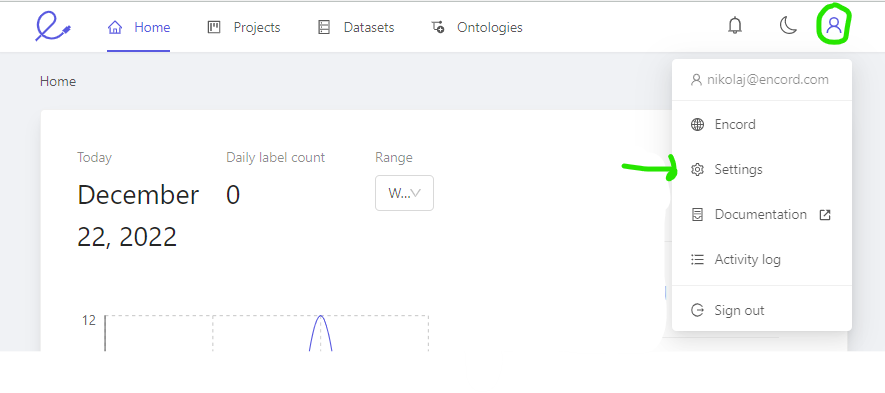

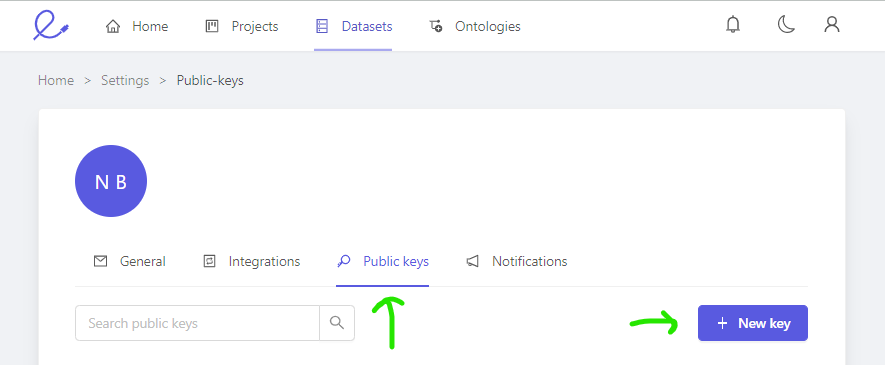

3. Give your key a title in the **key title** field and paste the public key printed above in the **public key** field:
    
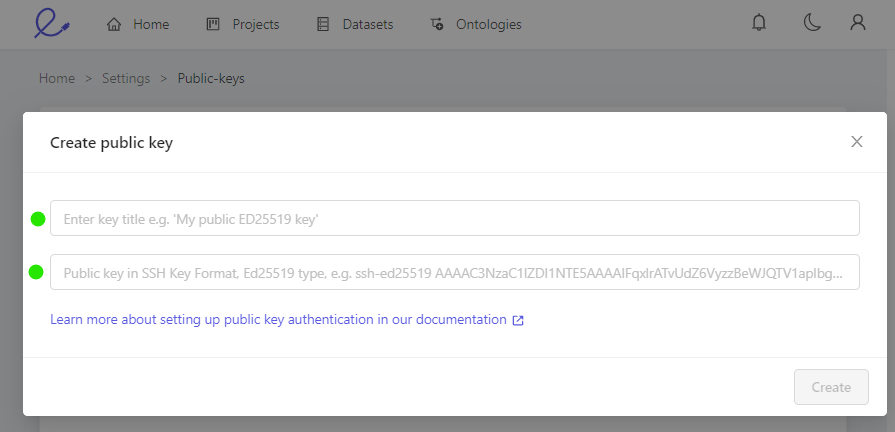



## 2. Importing Encord Project

Now you are setup to import your projects.

Again, the steps above are a one-time-only thing. You can repeat the following process for any of your projects without having to deal with ssh keys.

Let's start by listing your available projects:

In [ ]:
!encord-active print encord-projects

# Or by code:
# print(get_projects_json(private_key_file))

From the list, choose the `project-hash` (key-parameter) of the project you want to import and paste it in the command below.

In [ ]:
!encord-active import project --project-hash "d6423838-f60e-41d9-b2ca-715aa2edef9c"

## 3. Open the App

Encord Active will now have downloaded your data and run the prebuilt metric functions on your data.
The data will be stored in a subdirectory of your current working directory with the name of the project.

You will be able to see the `[name-of-your-project]` from the prints of the import process.

You can open the app with the following code block. It should open a new tab in your browser. If not, you can click the link printed to open it.

In [ ]:
!encord-active visualise -t "[name-of-your-project]"

## 4. Next Steps

You may want to import your model predictions as well.

For that, you can follow [this part](https://docs.encord.com/active/docs/workflows/import-predictions) of the documentation.

[The docs](https://docs.encord.com/active/docs/category/workflows) also describes workflows for, e.g., finding outliers in your data.